In [1]:
! pip install -q kaggle

In [2]:
!mkdir ~/.kaggle

In [4]:
!cp kaggle.json ~/.kaggle

In [5]:
!kaggle datasets download -d henrysue/online-shoppers-intention

  0% 0.00/252k [00:00<?, ?B/s]
100% 252k/252k [00:00<00:00, 110MB/s]


In [6]:
!unzip /content/online-shoppers-intention.zip

Archive:  /content/online-shoppers-intention.zip
  inflating: online_shoppers_intention.csv  


In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
df = pd.read_csv('/content/online_shoppers_intention.csv')
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [9]:
df.shape

(12330, 18)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [ ]:
df.isnull().any()

Administrative             False
Administrative_Duration    False
Informational              False
Informational_Duration     False
ProductRelated             False
ProductRelated_Duration    False
BounceRates                False
ExitRates                  False
PageValues                 False
SpecialDay                 False
Month                      False
OperatingSystems           False
Browser                    False
Region                     False
TrafficType                False
VisitorType                False
Weekend                    False
Revenue                    False
dtype: bool

In [ ]:
df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [ ]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [ ]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [ ]:

df.Month.nunique()

10

In [ ]:
df.Month.unique()

array(['Feb', 'Mar', 'May', 'Oct', 'June', 'Jul', 'Aug', 'Nov', 'Sep',
       'Dec'], dtype=object)

In [ ]:
df.Month.value_counts()

May     3364
Nov     2998
Mar     1907
Dec     1727
Oct      549
Sep      448
Aug      433
Jul      432
June     288
Feb      184
Name: Month, dtype: int64

In [ ]:
df.Region.value_counts()

1    4780
3    2403
4    1182
2    1136
6     805
7     761
9     511
8     434
5     318
Name: Region, dtype: int64

In [ ]:
df.VisitorType.value_counts()

Returning_Visitor    10551
New_Visitor           1694
Other                   85
Name: VisitorType, dtype: int64

In [ ]:
df.OperatingSystems.value_counts()

2    6601
1    2585
3    2555
4     478
8      79
6      19
7       7
5       6
Name: OperatingSystems, dtype: int64

In [ ]:
df.TrafficType.value_counts()

2     3913
1     2451
3     2052
4     1069
13     738
10     450
6      444
8      343
5      260
11     247
20     198
9       42
7       40
15      38
19      17
14      13
18      10
16       3
12       1
17       1
Name: TrafficType, dtype: int64

In [ ]:
df.corr()

<ipython-input-21-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue
Administrative,1.000000,0.601583,0.376850,0.255848,0.431119,0.373939,-0.223563,-0.316483,0.098990,-0.094778,-0.006347,-0.025035,-0.005487,-0.033561,0.026417,0.138917
Administrative_Duration,0.601583,1.000000,0.302710,0.238031,0.289087,0.355422,-0.144170,-0.205798,0.067608,-0.073304,-0.007343,-0.015392,-0.005561,-0.014376,0.014990,0.093587
Informational,0.376850,0.302710,1.000000,0.618955,0.374164,0.387505,-0.116114,-0.163666,0.048632,-0.048219,-0.009527,-0.038235,-0.029169,-0.034491,0.035785,0.095200
Informational_Duration,0.255848,0.238031,0.618955,1.000000,0.280046,0.347364,-0.074067,-0.105276,0.030861,-0.030577,-0.009579,-0.019285,-0.027144,-0.024675,0.024078,0.070345
ProductRelated,0.431119,0.289087,0.374164,0.280046,1.000000,0.860927,-0.204578,-0.292526,0.056282,-0.023958,0.004290,-0.013146,-0.038122,-0.043064,0.016092,0.158538
ProductRelated_Duration,0.373939,0.355422,0.387505,0.347364,0.860927,1.000000,-0.184541,-0.251984,0.052823,-0.036380,0.002976,-0.007380,-0.033091,-0.036377,0.007311,0.152373
BounceRates,-0.223563,-0.144170,-0.116114,-0.074067,-0.204578,-0.184541,1.000000,0.913004,-0.119386,0.072702,0.023823,-0.015772,-0.006485,0.078286,-0.046514,-0.150673
ExitRates,-0.316483,-0.205798,-0.163666,-0.105276,-0.292526,-0.251984,0.913004,1.000000,-0.174498,0.102242,0.014567,-0.004442,-0.008907,0.078616,-0.062587,-0.207071
PageValues,0.098990,0.067608,0.048632,0.030861,0.056282,0.052823,-0.119386,-0.174498,1.000000,-0.063541,0.018508,0.045592,0.011315,0.012532,0.012002,0.492569
SpecialDay,-0.094778,-0.073304,-0.048219,-0.030577,-0.023958,-0.036380,0.072702,0.102242,-0.063541,1.000000,0.012652,0.003499,-0.016098,0.052301,-0.016767,-0.082305


In [ ]:
df.corr().PageValues.sort_values(ascending =False)

<ipython-input-22-bf6b334c3965>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr().PageValues.sort_values(ascending =False)


PageValues                 1.000000
Revenue                    0.492569
Administrative             0.098990
Administrative_Duration    0.067608
ProductRelated             0.056282
ProductRelated_Duration    0.052823
Informational              0.048632
Browser                    0.045592
Informational_Duration     0.030861
OperatingSystems           0.018508
TrafficType                0.012532
Weekend                    0.012002
Region                     0.011315
SpecialDay                -0.063541
BounceRates               -0.119386
ExitRates                 -0.174498
Name: PageValues, dtype: float64

<ipython-input-23-545d5cc2b231>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.OperatingSystems)


<Axes: xlabel='OperatingSystems', ylabel='Density'>

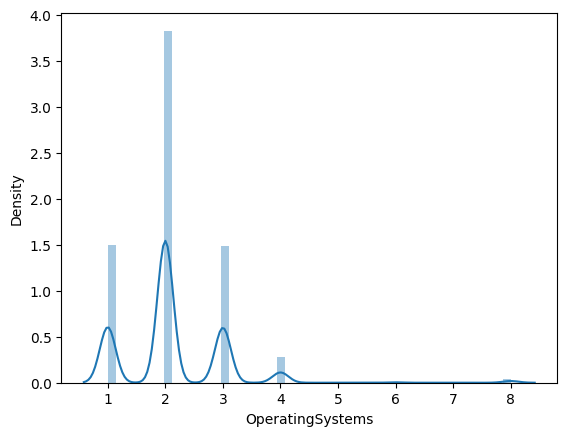

In [ ]:
##univariate Analysis

sns.distplot(df.OperatingSystems)

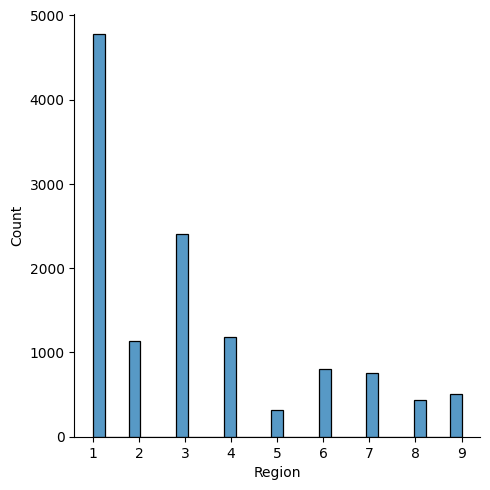

In [ ]:
sns.displot(df.Region)

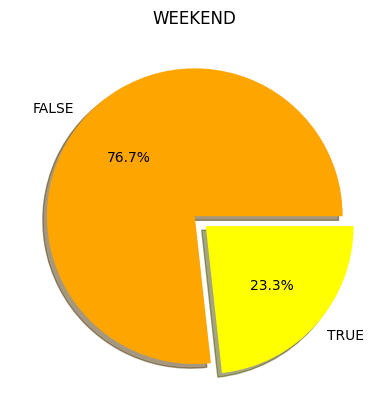

In [ ]:
plt.pie(df.Weekend.value_counts(),[0,0.1],labels = ['FALSE','TRUE'],autopct ='%1.1f%%',shadow = True,colors = ['orange','yellow'],)
plt.title('WEEKEND')
plt.show()

<Axes: ylabel='Region'>

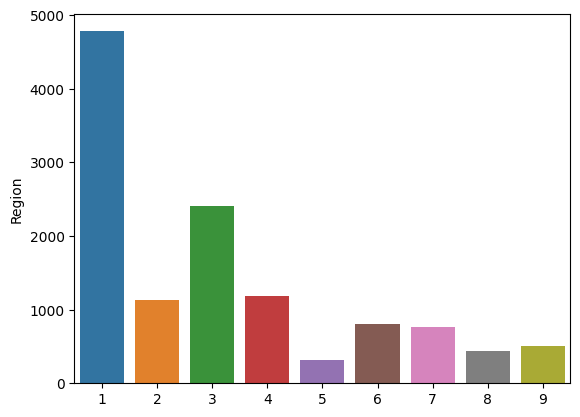

In [ ]:
sns.barplot(x =df.Region.value_counts().index,y =df.Region.value_counts() )

<Axes: ylabel='Browser'>

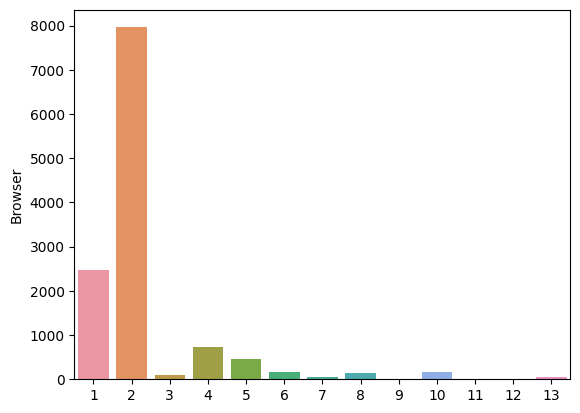

In [ ]:
sns.barplot(x =df.Browser.value_counts().index,y =df.Browser.value_counts() )

<Axes: xlabel='Month', ylabel='Region'>

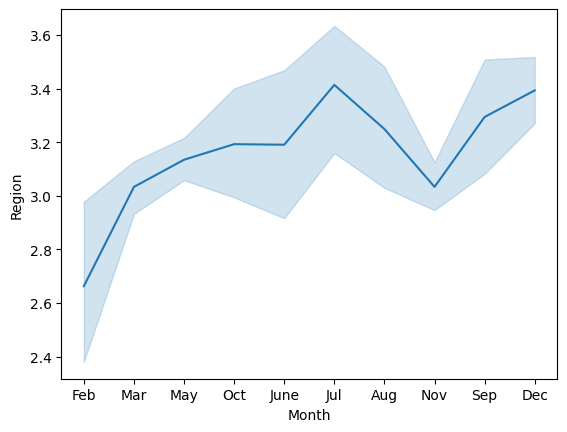

In [ ]:
##Bivariate Analysis

sns.lineplot(x = df.Month,y=df.Region)

<Axes: xlabel='Month', ylabel='TrafficType'>

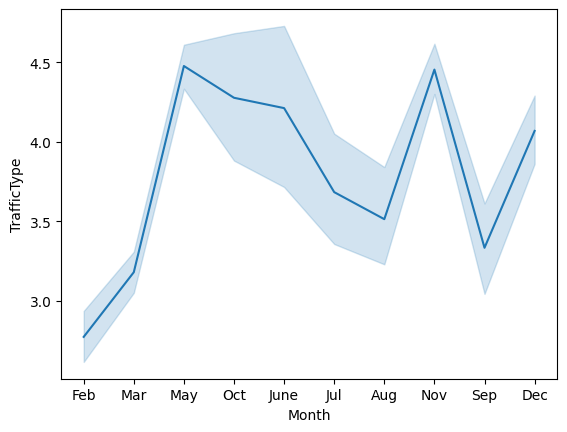

In [ ]:
sns.lineplot(x = df.Month,y=df.TrafficType)

<Axes: xlabel='Month', ylabel='Region'>

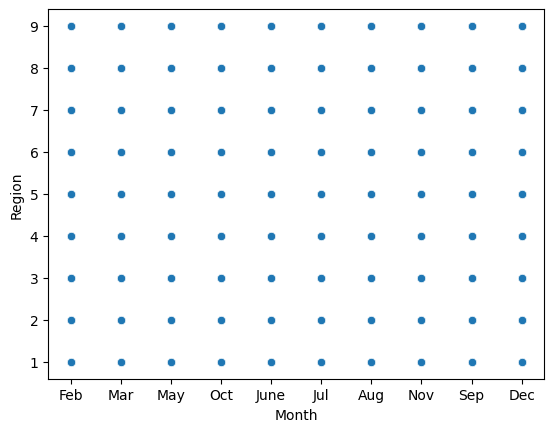

In [ ]:
sns.scatterplot(x = df.Month,y=df.Region)

<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


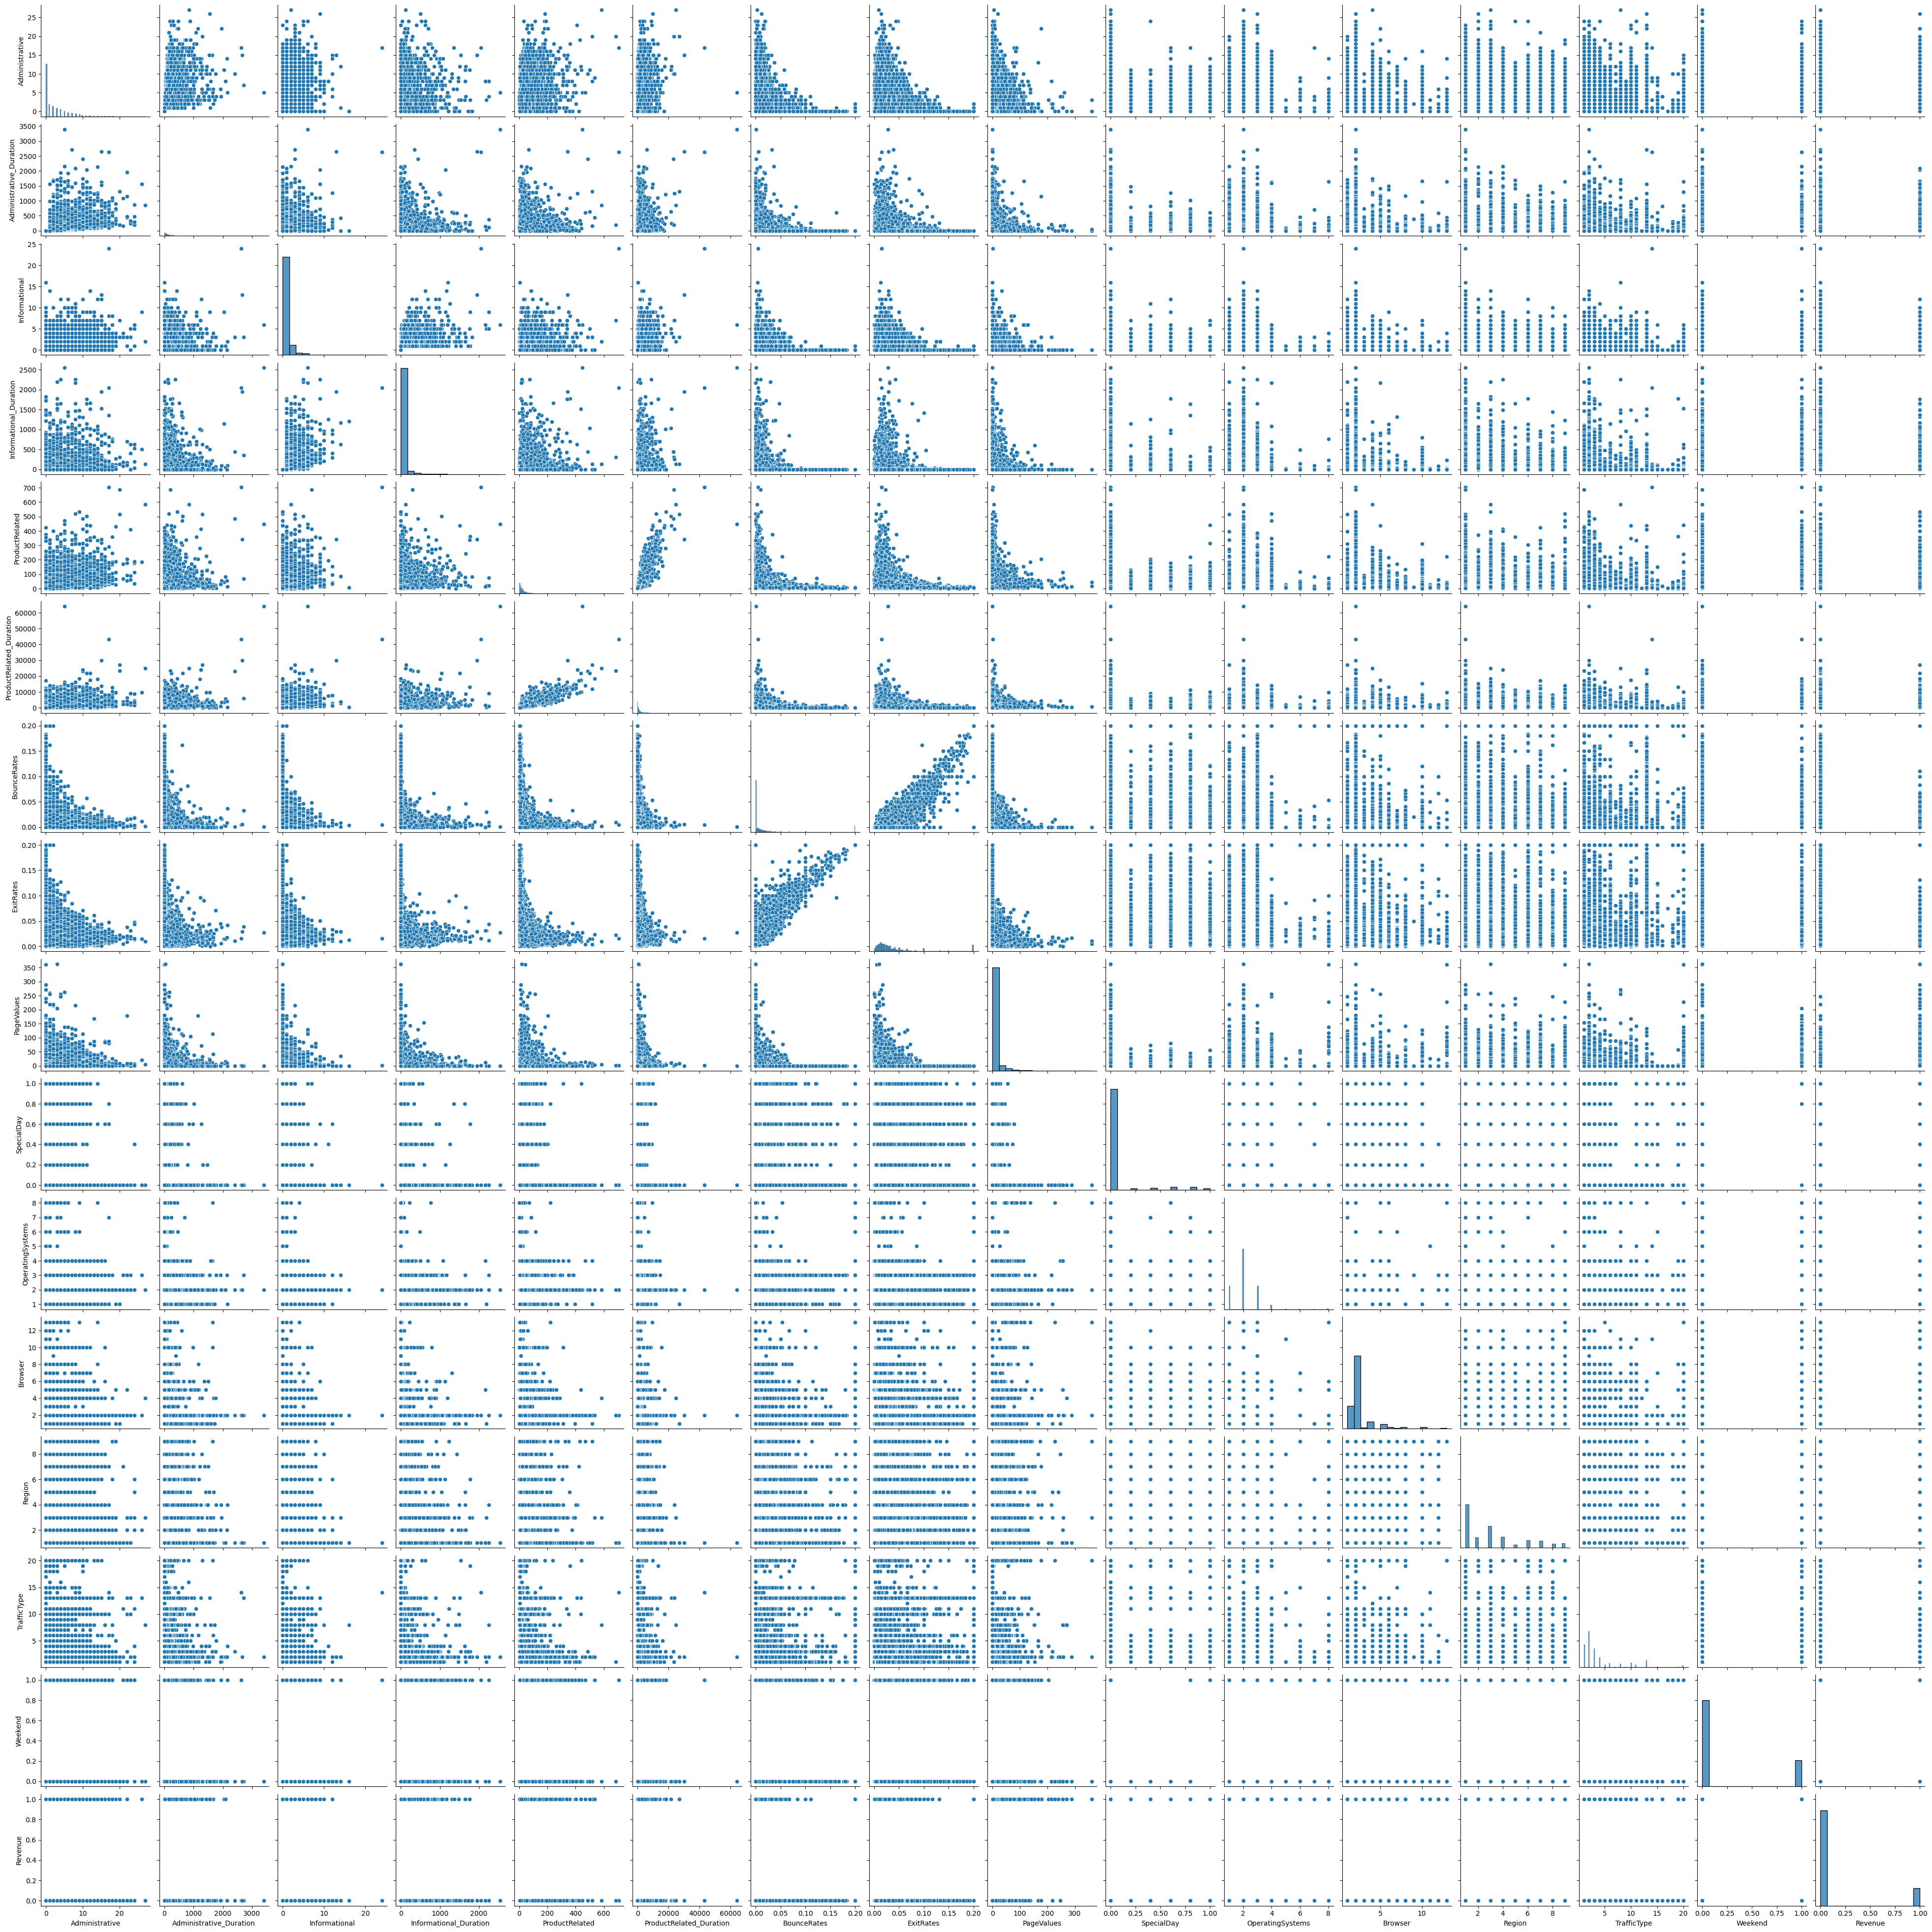

In [ ]:
##Multivariate Analysis

sns.pairplot(df)

<ipython-input-32-8df7bcac526d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

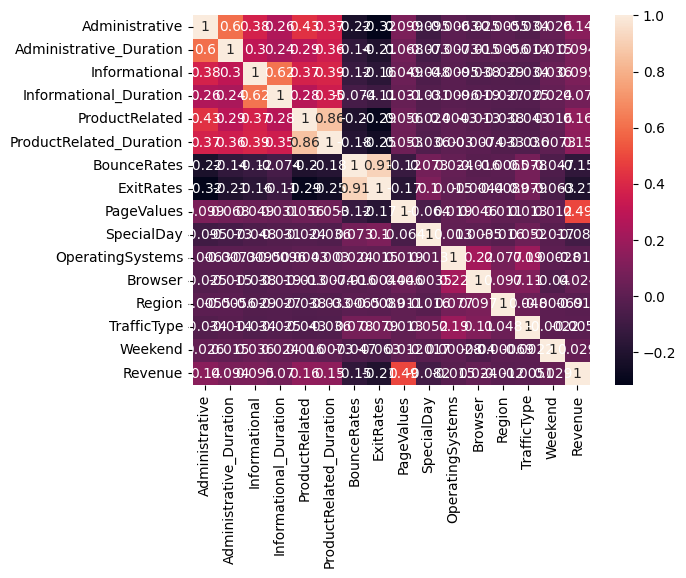

In [ ]:
sns.heatmap(df.corr(),annot=True)

In [ ]:
##outlier detection


df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


<Axes: >

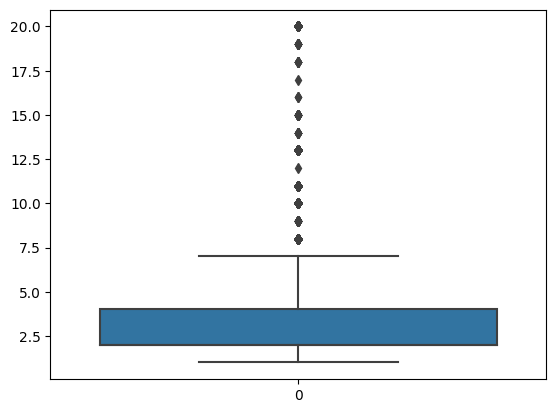

In [ ]:
sns.boxplot(df.TrafficType)

In [ ]:
q1 = df.TrafficType.quantile(0.25)
q3 = df.TrafficType.quantile(0.75)

In [ ]:
print(q1)
print(q3)

2.0
4.0


In [ ]:
IQR = q3-q1

In [ ]:
IQR

2.0

In [ ]:
upper_limit = q3+1.5*IQR

In [ ]:
upper_limit

7.0

In [ ]:
lower_limit =q1-1.5*IQR

In [ ]:
lower_limit

-1.0

In [ ]:
df.median()

<ipython-input-44-6d467abf240d>:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.median()


Administrative               1.000000
Administrative_Duration      7.500000
Informational                0.000000
Informational_Duration       0.000000
ProductRelated              18.000000
ProductRelated_Duration    598.936905
BounceRates                  0.003112
ExitRates                    0.025156
PageValues                   0.000000
SpecialDay                   0.000000
OperatingSystems             2.000000
Browser                      2.000000
Region                       3.000000
TrafficType                  2.000000
Weekend                      0.000000
Revenue                      0.000000
dtype: float64

In [ ]:
df['TrafficType'] = np.where(df['TrafficType']>upper_limit,30,df['TrafficType'])

<Axes: >

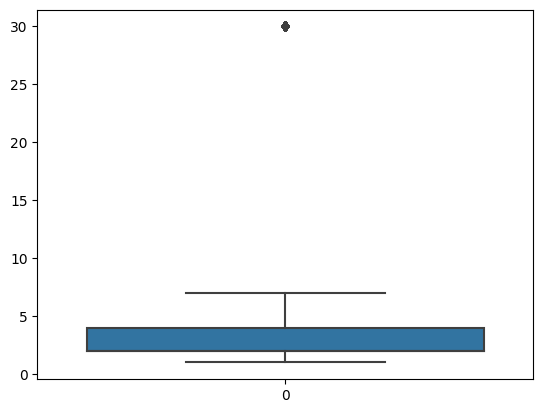

In [ ]:
sns.boxplot(df.TrafficType)

<Axes: >

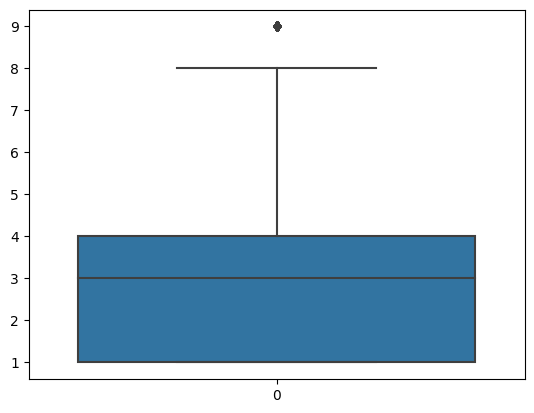

In [ ]:
sns.boxplot(df.Region)

<Axes: >

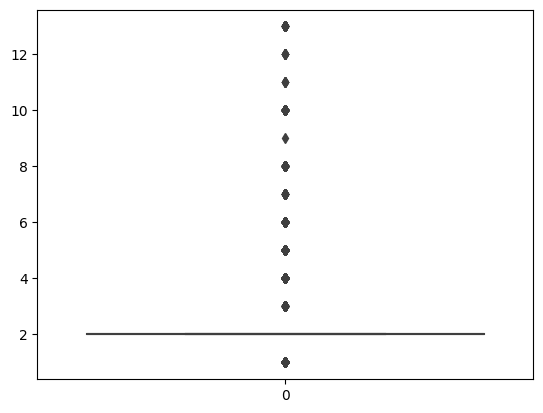

In [ ]:
sns.boxplot(df.Browser)

In [ ]:
q1 = df.Browser.quantile(0.25)
q3 = df.Browser.quantile(0.75)

In [ ]:
print(q1)
print(q3)

2.0
2.0


In [ ]:
IQR = q3-q1

In [ ]:
IQR

0.0

In [ ]:
upper_limit = q3+1.5*IQR

In [ ]:
upper_limit

2.0

In [ ]:
lower_limit =q1-1.5*IQR

In [ ]:
lower_limit

2.0

In [ ]:
df.median()

<ipython-input-57-6d467abf240d>:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.median()


Administrative               1.000000
Administrative_Duration      7.500000
Informational                0.000000
Informational_Duration       0.000000
ProductRelated              18.000000
ProductRelated_Duration    598.936905
BounceRates                  0.003112
ExitRates                    0.025156
PageValues                   0.000000
SpecialDay                   0.000000
OperatingSystems             2.000000
Browser                      2.000000
Region                       3.000000
TrafficType                  2.000000
Weekend                      0.000000
Revenue                      0.000000
dtype: float64

In [ ]:
df['Browser'] = np.where(df['Browser']>upper_limit,30,df['Browser'])

<Axes: >

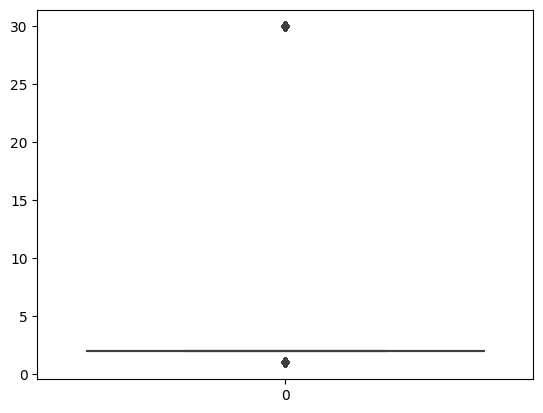

In [ ]:

sns.boxplot(df.Browser)

<Axes: >

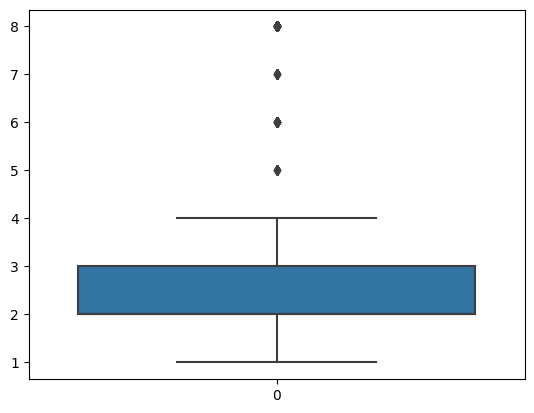

In [ ]:
sns.boxplot(df.OperatingSystems)

In [ ]:
q1 = df.OperatingSystems.quantile(0.25)
q3 = df.OperatingSystems.quantile(0.75)

In [ ]:
print(q1)
print(q3)

2.0
3.0


In [ ]:
IQR = q3-q1

In [ ]:
IQR

1.0

In [ ]:
upper_limit = q3+1.5*IQR

In [ ]:
upper_limit

4.5

In [ ]:
lower_limit =q1-1.5*IQR

In [ ]:
lower_limit

0.5

In [ ]:
df.median()

<ipython-input-71-6d467abf240d>:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.median()


Administrative               1.000000
Administrative_Duration      7.500000
Informational                0.000000
Informational_Duration       0.000000
ProductRelated              18.000000
ProductRelated_Duration    598.936905
BounceRates                  0.003112
ExitRates                    0.025156
PageValues                   0.000000
SpecialDay                   0.000000
OperatingSystems             2.000000
Browser                      2.000000
Region                       3.000000
TrafficType                  2.000000
Weekend                      0.000000
Revenue                      0.000000
dtype: float64

In [ ]:
df['OperatingSystems'] = np.where(df['OperatingSystems']>upper_limit,30,df['OperatingSystems'])

<Axes: >

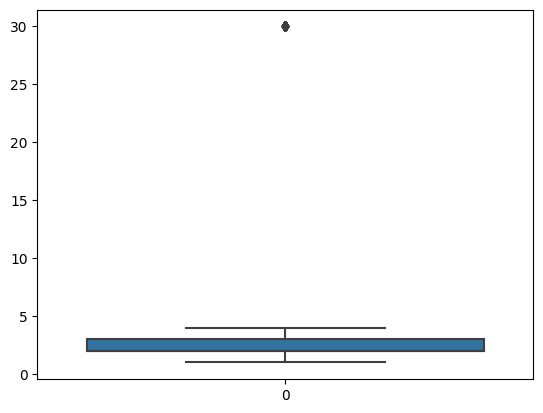

In [ ]:
sns.boxplot(df.OperatingSystems)

<Axes: >

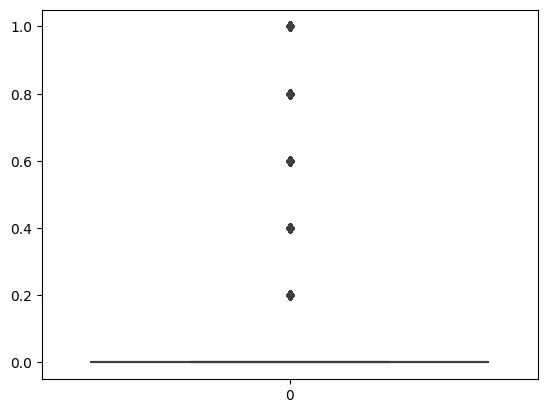

In [ ]:
sns.boxplot(df.SpecialDay)

In [ ]:
q1 = df.SpecialDay.quantile(0.25)
q3 = df.SpecialDay.quantile(0.75)

In [ ]:
print(q1)
print(q3)

0.0
0.0


In [ ]:
IQR = q3-q1

In [ ]:
IQR

0.0

In [ ]:
upper_limit = q3+1.5*IQR

In [ ]:
upper_limit

0.0

In [ ]:
lower_limit =q1-1.5*IQR

In [ ]:
lower_limit

0.0

In [ ]:
df.median()

<ipython-input-83-6d467abf240d>:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.median()


Administrative               1.000000
Administrative_Duration      7.500000
Informational                0.000000
Informational_Duration       0.000000
ProductRelated              18.000000
ProductRelated_Duration    598.936905
BounceRates                  0.003112
ExitRates                    0.025156
PageValues                   0.000000
SpecialDay                   0.000000
OperatingSystems             2.000000
Browser                      2.000000
Region                       3.000000
TrafficType                  2.000000
Weekend                      0.000000
Revenue                      0.000000
dtype: float64

In [ ]:
df['SpecialDay'] = np.where(df['SpecialDay']>upper_limit,30,df['SpecialDay'])

<Axes: >

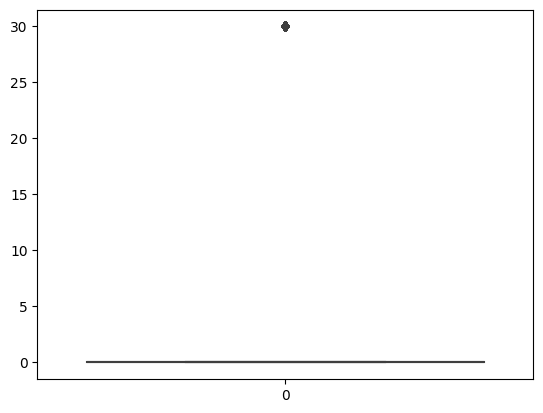

In [ ]:
sns.boxplot(df.SpecialDay)

<Axes: >

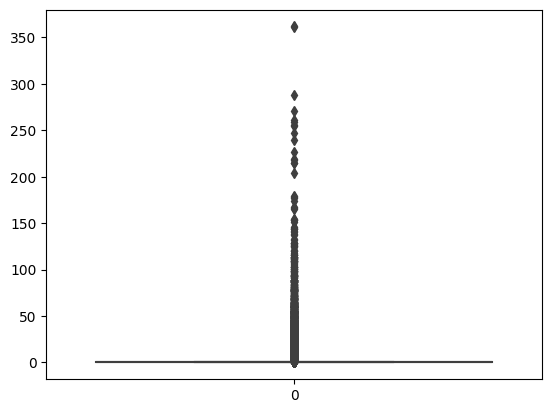

In [ ]:
sns.boxplot(df.PageValues)

In [ ]:

q1 = df.PageValues.quantile(0.25)
q3 = df.PageValues.quantile(0.75)

In [ ]:
print(q1)
print(q3)

0.0
0.0


In [ ]:
IQR = q3-q1

In [ ]:
IQR

0.0

In [ ]:
upper_limit = q3+1.5*IQR

In [ ]:
upper_limit

0.0

In [ ]:
lower_limit =q1-1.5*IQR

In [ ]:
lower_limit

0.0

In [ ]:
df.median()

<ipython-input-96-6d467abf240d>:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.median()


Administrative               1.000000
Administrative_Duration      7.500000
Informational                0.000000
Informational_Duration       0.000000
ProductRelated              18.000000
ProductRelated_Duration    598.936905
BounceRates                  0.003112
ExitRates                    0.025156
PageValues                   0.000000
SpecialDay                   0.000000
OperatingSystems             2.000000
Browser                      2.000000
Region                       3.000000
TrafficType                  2.000000
Weekend                      0.000000
Revenue                      0.000000
dtype: float64

In [ ]:
df['PageValues'] = np.where(df['PageValues']>upper_limit,30,df['PageValues'])


<Axes: >

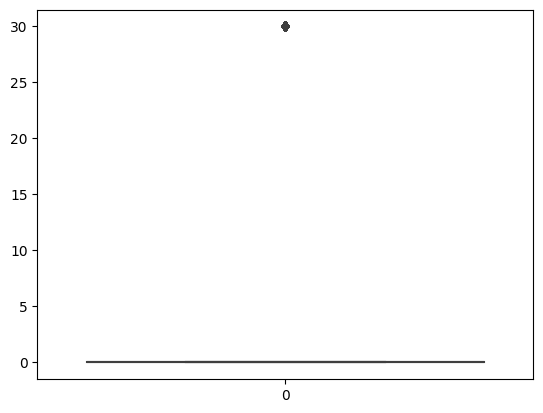

In [ ]:
sns.boxplot(df.PageValues)

<Axes: >

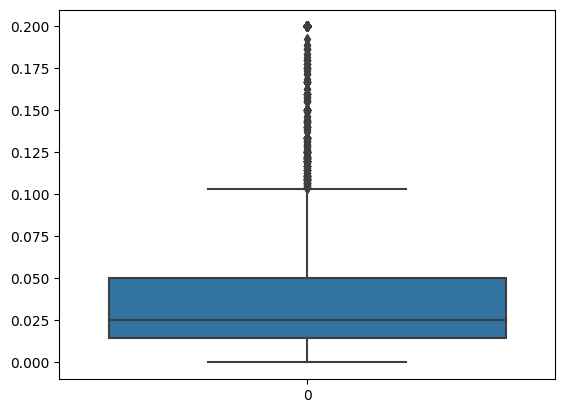

In [ ]:
sns.boxplot(df.ExitRates)

In [ ]:
q1 = df.ExitRates.quantile(0.25)
q3 = df.ExitRates.quantile(0.75)

In [ ]:
print(q1)
print(q3)

0.014285714
0.05


In [ ]:
IQR = q3-q1

In [ ]:
IQR

0.035714286000000005

In [ ]:
upper_limit = q3+1.5*IQR

In [ ]:
upper_limit

0.103571429

In [ ]:
lower_limit =q1-1.5*IQR

In [ ]:
lower_limit

-0.039285715000000006

In [ ]:
df.median()

<ipython-input-110-6d467abf240d>:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.median()


Administrative               1.000000
Administrative_Duration      7.500000
Informational                0.000000
Informational_Duration       0.000000
ProductRelated              18.000000
ProductRelated_Duration    598.936905
BounceRates                  0.003112
ExitRates                    0.025156
PageValues                   0.000000
SpecialDay                   0.000000
OperatingSystems             2.000000
Browser                      2.000000
Region                       3.000000
TrafficType                  2.000000
Weekend                      0.000000
Revenue                      0.000000
dtype: float64

In [ ]:
df['ExitRates'] = np.where(df['ExitRates']>upper_limit,30,df['ExitRates'])

<Axes: >

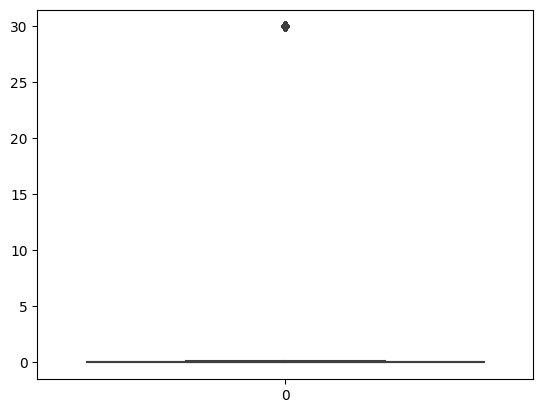

In [ ]:
sns.boxplot(df.ExitRates)

<Axes: >

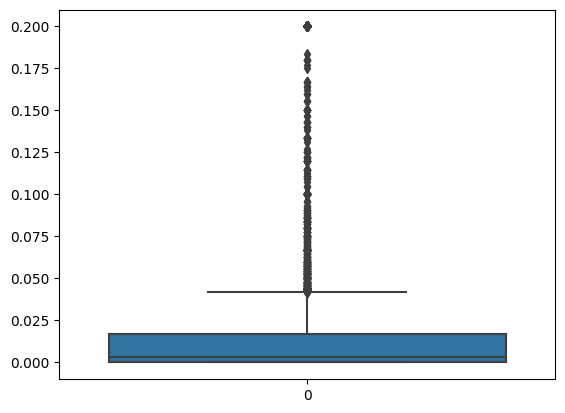

In [ ]:
sns.boxplot(df.BounceRates )

In [ ]:
q1 = df.BounceRates.quantile(0.25)
q3 = df.BounceRates.quantile(0.75)

In [ ]:
print(q1)
print(q3)

0.0
0.016812558499999998


In [ ]:
IQR = q3-q1

In [ ]:
IQR

0.016812558499999998

In [ ]:
upper_limit = q3+1.5*IQR

In [ ]:
upper_limit

0.04203139624999999

In [ ]:
lower_limit =q1-1.5*IQR

In [ ]:
lower_limit

-0.025218837749999997

In [ ]:
df.median()

<ipython-input-123-6d467abf240d>:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.median()


Administrative               1.000000
Administrative_Duration      7.500000
Informational                0.000000
Informational_Duration       0.000000
ProductRelated              18.000000
ProductRelated_Duration    598.936905
BounceRates                  0.003112
ExitRates                    0.025156
PageValues                   0.000000
SpecialDay                   0.000000
OperatingSystems             2.000000
Browser                      2.000000
Region                       3.000000
TrafficType                  2.000000
Weekend                      0.000000
Revenue                      0.000000
dtype: float64

In [ ]:
df['BounceRates'] = np.where(df['BounceRates']>upper_limit,30,df['BounceRates'])

<Axes: >

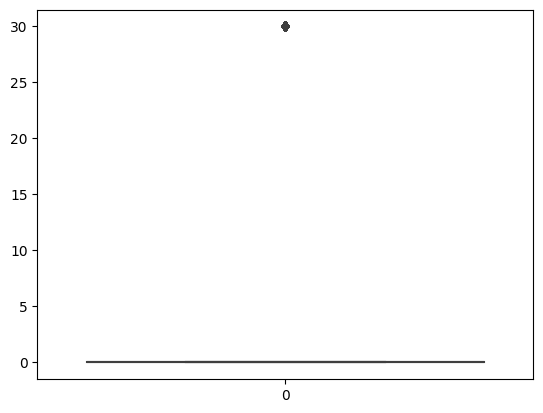

In [ ]:
sns.boxplot(df.BounceRates)


<Axes: >

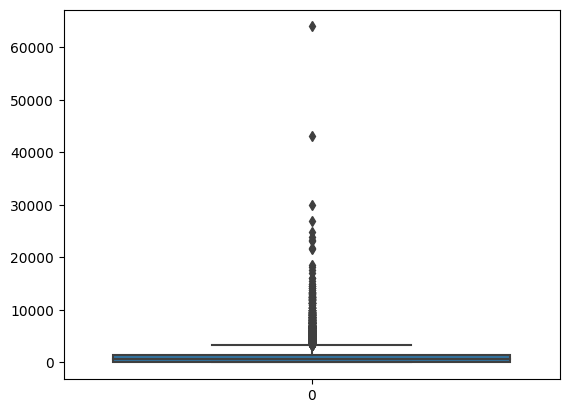

In [ ]:
sns.boxplot(df.ProductRelated_Duration)

In [ ]:
q1 = df.ProductRelated_Duration.quantile(0.25)
q3 = df.ProductRelated_Duration.quantile(0.75)

In [ ]:
print(q1)
print(q3)

184.1375
1464.1572135000001


In [ ]:
IQR = q3-q1

In [ ]:
IQR

1280.0197135

In [ ]:
upper_limit = q3+1.5*IQR

In [ ]:
upper_limit

3384.1867837500004

In [ ]:
lower_limit =q1-1.5*IQR

In [ ]:
lower_limit

-1735.8920702500002

In [ ]:
df.median()

<ipython-input-136-6d467abf240d>:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.median()


Administrative               1.000000
Administrative_Duration      7.500000
Informational                0.000000
Informational_Duration       0.000000
ProductRelated              18.000000
ProductRelated_Duration    598.936905
BounceRates                  0.003112
ExitRates                    0.025156
PageValues                   0.000000
SpecialDay                   0.000000
OperatingSystems             2.000000
Browser                      2.000000
Region                       3.000000
TrafficType                  2.000000
Weekend                      0.000000
Revenue                      0.000000
dtype: float64

In [ ]:
df['ProductRelated_Duration'] = np.where(df['ProductRelated_Duration']>upper_limit,30,df['ProductRelated_Duration'])

<Axes: >

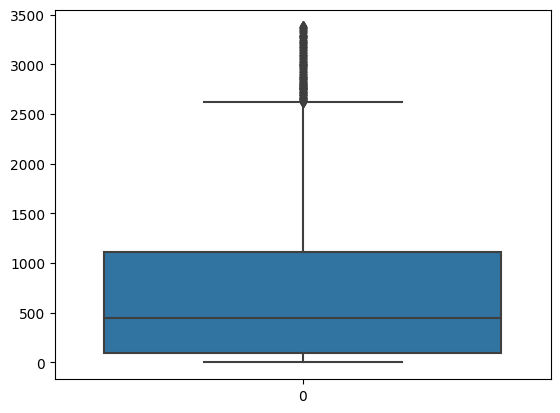

In [ ]:
sns.boxplot(df.ProductRelated_Duration)

<Axes: >

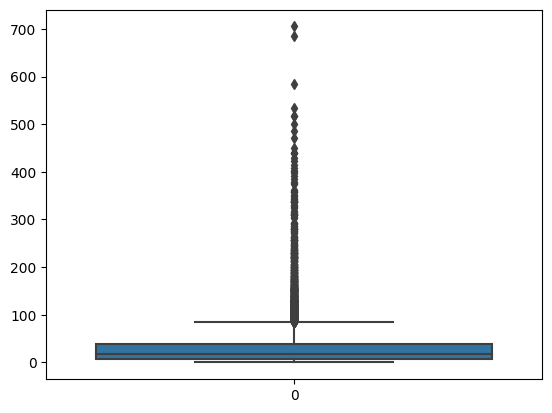

In [ ]:
sns.boxplot(df.ProductRelated)

In [ ]:
q1 = df.ProductRelated.quantile(0.25)
q3 = df.ProductRelated.quantile(0.75)

In [ ]:
print(q1)
print(q3)

7.0
38.0


In [ ]:
IQR = q3-q1

In [ ]:

IQR

31.0

In [ ]:
upper_limit = q3+1.5*IQR


In [ ]:

upper_limit

84.5

In [ ]:
lower_limit =q1-1.5*IQR

In [ ]:
lower_limit

-39.5

In [ ]:
df.median()

<ipython-input-160-6d467abf240d>:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.median()


Administrative               1.000000
Administrative_Duration      7.500000
Informational                0.000000
Informational_Duration       0.000000
ProductRelated              18.000000
ProductRelated_Duration    443.229167
BounceRates                  0.003112
ExitRates                    0.025156
PageValues                   0.000000
SpecialDay                   0.000000
OperatingSystems             2.000000
Browser                      2.000000
Region                       3.000000
TrafficType                  2.000000
Weekend                      0.000000
Revenue                      0.000000
dtype: float64

In [ ]:
df['ProductRelated'] = np.where(df['ProductRelated']>upper_limit,30,df['ProductRelated'])

<Axes: >

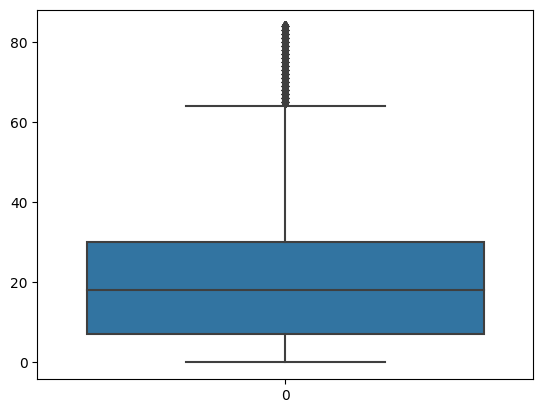

In [ ]:
sns.boxplot(df.ProductRelated)

<Axes: >

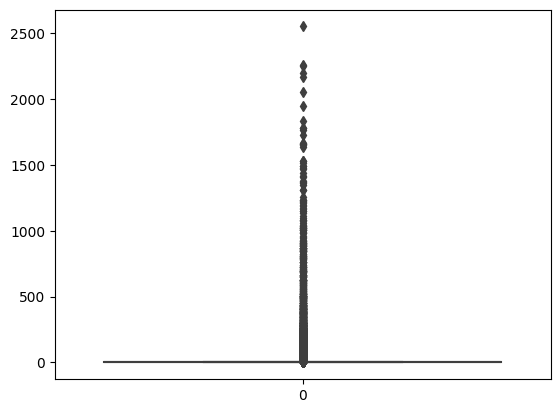

In [ ]:
sns.boxplot(df.Informational_Duration)

In [ ]:
q1 = df.Informational_Duration.quantile(0.25)
q3 = df.Informational_Duration.quantile(0.75)

In [ ]:
print(q1)
print(q3)

0.0
0.0


In [ ]:
IQR = q3-q1

In [ ]:
IQR

0.0

In [ ]:
upper_limit = q3+1.5*IQR

In [ ]:
upper_limit

0.0

In [ ]:
lower_limit =q1-1.5*IQR

In [ ]:
lower_limit

0.0

In [ ]:
df.median()

<ipython-input-173-6d467abf240d>:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.median()


Administrative               1.000000
Administrative_Duration      7.500000
Informational                0.000000
Informational_Duration       0.000000
ProductRelated              18.000000
ProductRelated_Duration    443.229167
BounceRates                  0.003112
ExitRates                    0.025156
PageValues                   0.000000
SpecialDay                   0.000000
OperatingSystems             2.000000
Browser                      2.000000
Region                       3.000000
TrafficType                  2.000000
Weekend                      0.000000
Revenue                      0.000000
dtype: float64

In [ ]:
df['Informational_Duration'] = np.where(df['Informational_Duration']>upper_limit,30,df['Informational_Duration'])

<Axes: >

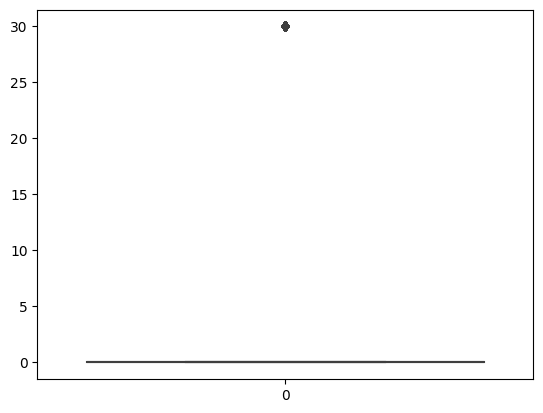

In [ ]:
sns.boxplot(df.Informational_Duration)

<Axes: >

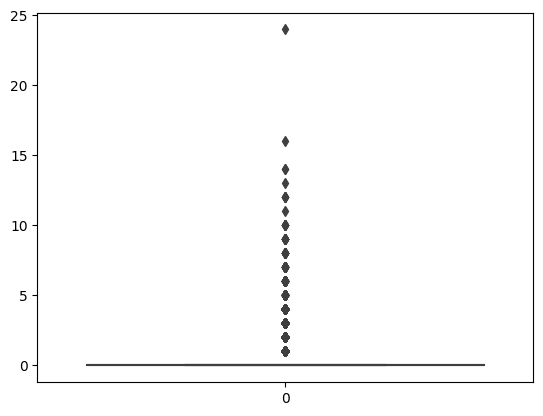

In [ ]:
sns.boxplot(df.Informational)

In [ ]:
q1 = df.Informational.quantile(0.25)
q3 = df.Informational.quantile(0.75)

In [ ]:
print(q1)
print(q3)

0.0
0.0


In [ ]:
IQR = q3-q1

In [ ]:
IQR

0.0

In [ ]:
upper_limit = q3+1.5*IQR

In [ ]:
upper_limit

0.0

In [ ]:
lower_limit =q1-1.5*IQR

In [ ]:
lower_limit

0.0

In [ ]:
df.median()

<ipython-input-185-6d467abf240d>:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.median()


Administrative               1.000000
Administrative_Duration      7.500000
Informational                0.000000
Informational_Duration       0.000000
ProductRelated              18.000000
ProductRelated_Duration    443.229167
BounceRates                  0.003112
ExitRates                    0.025156
PageValues                   0.000000
SpecialDay                   0.000000
OperatingSystems             2.000000
Browser                      2.000000
Region                       3.000000
TrafficType                  2.000000
Weekend                      0.000000
Revenue                      0.000000
dtype: float64

In [ ]:
df['Informational'] = np.where(df['Informational']>upper_limit,30,df['Informational'])

<Axes: >

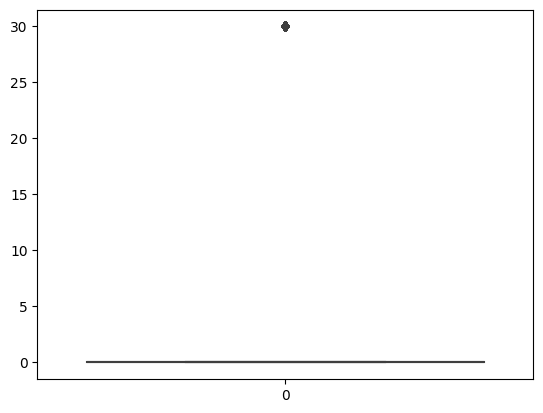

In [ ]:
sns.boxplot(df.Informational)

<Axes: >

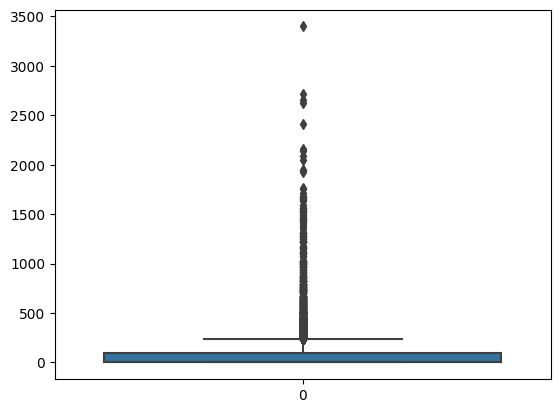

In [ ]:
sns.boxplot(df.Administrative_Duration)

In [ ]:
q1 = df.Administrative_Duration.quantile(0.25)
q3 = df.Administrative_Duration.quantile(0.75)

In [ ]:
print(q1)
print(q3)

0.0
93.25625


In [ ]:
IQR = q3-q1

In [ ]:
IQR

93.25625

In [ ]:
upper_limit = q3+1.5*IQR

In [ ]:
upper_limit

233.14062499999997

In [ ]:
lower_limit =q1-1.5*IQR

In [ ]:
lower_limit

-139.88437499999998

In [ ]:
df.median()

<ipython-input-197-6d467abf240d>:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.median()


Administrative               1.000000
Administrative_Duration      7.500000
Informational                0.000000
Informational_Duration       0.000000
ProductRelated              18.000000
ProductRelated_Duration    443.229167
BounceRates                  0.003112
ExitRates                    0.025156
PageValues                   0.000000
SpecialDay                   0.000000
OperatingSystems             2.000000
Browser                      2.000000
Region                       3.000000
TrafficType                  2.000000
Weekend                      0.000000
Revenue                      0.000000
dtype: float64

In [ ]:
df['Administrative_Duration'] = np.where(df['Administrative_Duration']>upper_limit,30,df['Administrative_Duration'])

<Axes: >

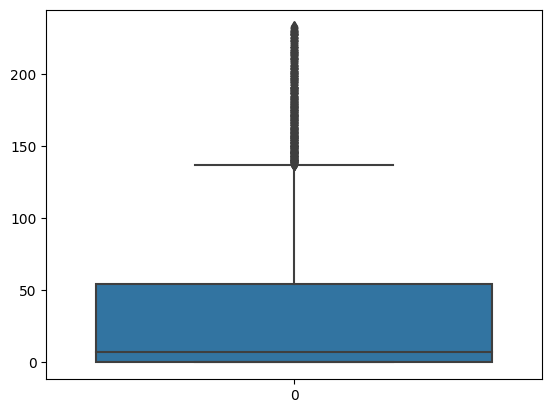

In [ ]:
sns.boxplot(df.Administrative_Duration)

<Axes: >

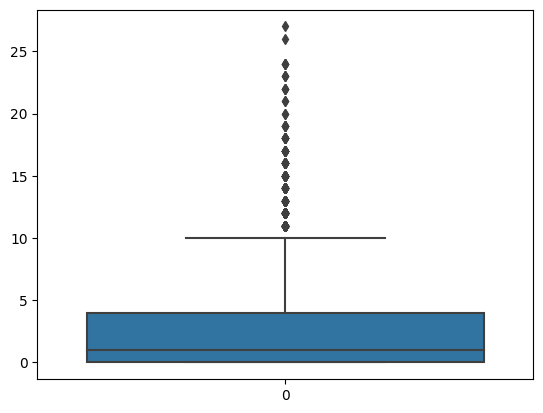

In [ ]:
sns.boxplot(df.Administrative)

In [ ]:
q1 = df.Administrative.quantile(0.25)
q3 = df.Administrative.quantile(0.75)

In [ ]:
print(q1)
print(q3)

0.0
4.0


In [ ]:
IQR = q3-q1

In [ ]:
IQR

4.0

In [ ]:
upper_limit = q3+1.5*IQR

In [ ]:
upper_limit

10.0

In [ ]:

lower_limit =q1-1.5*IQR

In [ ]:
lower_limit

-6.0

In [ ]:

df.median()

<ipython-input-209-6d467abf240d>:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.median()


Administrative               1.000000
Administrative_Duration      7.500000
Informational                0.000000
Informational_Duration       0.000000
ProductRelated              18.000000
ProductRelated_Duration    443.229167
BounceRates                  0.003112
ExitRates                    0.025156
PageValues                   0.000000
SpecialDay                   0.000000
OperatingSystems             2.000000
Browser                      2.000000
Region                       3.000000
TrafficType                  2.000000
Weekend                      0.000000
Revenue                      0.000000
dtype: float64

In [ ]:
df['Administrative'] = np.where(df['Administrative']>upper_limit,30,df['Administrative'])

<Axes: >

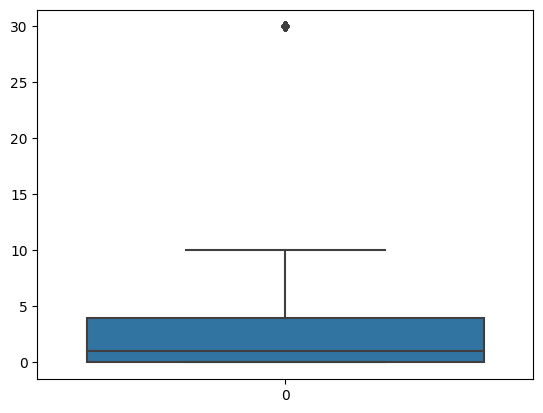

In [ ]:
sns.boxplot(df.Administrative)

In [13]:
##1.Label Encoding

from sklearn.preprocessing import LabelEncoder

In [14]:
le = LabelEncoder()

In [30]:
df.Region = le.fit_transform(df.Region)

In [31]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,1,1,0,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,2,2,2,0,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,4,1,8,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,2,3,2,1,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,2,3,3,0,4,Returning_Visitor,True,False


In [32]:
df.corr()

<ipython-input-32-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue
Administrative,1.000000,0.601583,0.376850,0.255848,0.431119,0.373939,-0.223563,-0.316483,0.098990,-0.094778,0.048560,-0.006347,-0.025035,-0.005487,-0.033561,0.026417,0.138917
Administrative_Duration,0.601583,1.000000,0.302710,0.238031,0.289087,0.355422,-0.144170,-0.205798,0.067608,-0.073304,0.029061,-0.007343,-0.015392,-0.005561,-0.014376,0.014990,0.093587
Informational,0.376850,0.302710,1.000000,0.618955,0.374164,0.387505,-0.116114,-0.163666,0.048632,-0.048219,0.019743,-0.009527,-0.038235,-0.029169,-0.034491,0.035785,0.095200
Informational_Duration,0.255848,0.238031,0.618955,1.000000,0.280046,0.347364,-0.074067,-0.105276,0.030861,-0.030577,0.005987,-0.009579,-0.019285,-0.027144,-0.024675,0.024078,0.070345
ProductRelated,0.431119,0.289087,0.374164,0.280046,1.000000,0.860927,-0.204578,-0.292526,0.056282,-0.023958,0.070299,0.004290,-0.013146,-0.038122,-0.043064,0.016092,0.158538
ProductRelated_Duration,0.373939,0.355422,0.387505,0.347364,0.860927,1.000000,-0.184541,-0.251984,0.052823,-0.036380,0.061186,0.002976,-0.007380,-0.033091,-0.036377,0.007311,0.152373
BounceRates,-0.223563,-0.144170,-0.116114,-0.074067,-0.204578,-0.184541,1.000000,0.913004,-0.119386,0.072702,-0.023763,0.023823,-0.015772,-0.006485,0.078286,-0.046514,-0.150673
ExitRates,-0.316483,-0.205798,-0.163666,-0.105276,-0.292526,-0.251984,0.913004,1.000000,-0.174498,0.102242,-0.039049,0.014567,-0.004442,-0.008907,0.078616,-0.062587,-0.207071
PageValues,0.098990,0.067608,0.048632,0.030861,0.056282,0.052823,-0.119386,-0.174498,1.000000,-0.063541,0.021780,0.018508,0.045592,0.011315,0.012532,0.012002,0.492569
SpecialDay,-0.094778,-0.073304,-0.048219,-0.030577,-0.023958,-0.036380,0.072702,0.102242,-0.063541,1.000000,0.079341,0.012652,0.003499,-0.016098,0.052301,-0.016767,-0.082305


In [33]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,5.163990,2.124006,2.357097,2.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,2.370199,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,5.000000,2.000000,2.000000,0.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,6.000000,2.000000,2.000000,2.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,7.000000,3.000000,2.000000,3.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,9.000000,8.000000,13.000000,8.000000,20.000000


<ipython-input-34-8451b8490161>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot =True)


<Axes: >

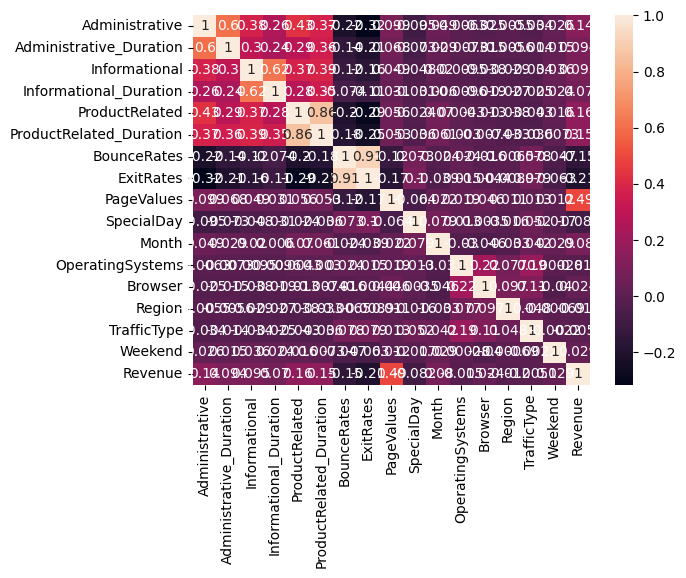

In [34]:
sns.heatmap(df.corr(),annot =True)

In [36]:
x=df.iloc[:,:-1]

In [38]:
x.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,1,1,0,1,Returning_Visitor,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,2,2,2,0,2,Returning_Visitor,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,4,1,8,3,Returning_Visitor,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,2,3,2,1,4,Returning_Visitor,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,2,3,3,0,4,Returning_Visitor,True


In [47]:
y=df.BounceRates
y.head()

0    0.20
1    0.00
2    0.20
3    0.05
4    0.02
Name: BounceRates, dtype: float64

In [41]:
from sklearn.preprocessing import MinMaxScaler
scale =MinMaxScaler()

In [43]:
scaled_x = pd.DataFrame(scale.fit_transform(X),columns =X.columns)
scaled_x.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,BounceRates,ExitRates,PageValues,SpecialDay,Month,...,Browser,Region,TrafficType,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor,Weekend_False,Weekend_True,Revenue_False,Revenue_True
0,0.0,0.0,0.0,0.0,0.001418,1.00,1.00,0.0,0.0,0.222222,...,0.000000,0.000,0.000000,0.0,0.0,1.0,1.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.002837,0.00,0.50,0.0,0.0,0.222222,...,0.083333,0.000,0.052632,0.0,0.0,1.0,1.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.001418,1.00,1.00,0.0,0.0,0.222222,...,0.000000,1.000,0.105263,0.0,0.0,1.0,1.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.002837,0.25,0.70,0.0,0.0,0.222222,...,0.083333,0.125,0.157895,0.0,0.0,1.0,1.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.014184,0.10,0.25,0.0,0.0,0.222222,...,0.166667,0.000,0.157895,0.0,0.0,1.0,0.0,1.0,1.0,0.0


In [44]:
# Train test split

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(scaled_x,y,test_size = 0.2,random_state = 0)

In [45]:
x_train.shape

(9864, 21)

In [46]:
x_test.shape

(2466, 21)

In [48]:
## Model building

from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [49]:
model.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [50]:
pred = model.predict(x_test)

In [51]:
pred

array([7, 1, 7, ..., 6, 7, 5])

In [94]:
y_test

12245    7
9704     1
9177     7
8848     7
2768     6
        ..
9606     7
9095     1
3172     6
8009     7
1672     5
Name: Month, Length: 2466, dtype: int64

In [108]:
##Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier
model =RandomForestClassifier(criterion='entropy')

In [109]:
model.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy')

In [110]:
r_y_predict = model.predict(x_test)
r_y_predict_train = model.predict(x_train)

In [111]:
print('Testing Accuracy = ', accuracy_score(y_test,r_y_predict))
print('Training Accuracy = ', accuracy_score(y_train,r_y_predict_train))

Testing Accuracy =  0.9898621248986212
Training Accuracy =  1.0


In [112]:
pd.crosstab(y_test,r_y_predict)

col_0,0,1,2,3,4,5,6,7,8,9
Month,,,,,,,,,,
0,80,6,0,0,0,0,0,0,0,0
1,0,337,0,0,0,0,0,0,0,0
2,0,3,28,1,0,0,0,0,0,0
3,0,2,0,84,0,0,0,0,0,0
4,0,0,0,0,53,0,0,0,0,0
5,0,0,0,0,0,372,0,0,0,0
6,0,0,0,0,0,0,667,0,0,0
7,0,0,0,0,0,0,0,620,0,0
8,0,0,0,0,0,0,0,4,105,0


In [121]:
print(classification_report(y_test,r_y_predict))

              precision    recall  f1-score   support

           0       1.00      0.93      0.96        86
           1       0.97      1.00      0.98       337
           2       1.00      0.88      0.93        32
           3       0.99      0.98      0.98        86
           4       1.00      1.00      1.00        53
           5       1.00      1.00      1.00       372
           6       1.00      1.00      1.00       667
           7       0.98      1.00      0.99       620
           8       0.98      0.96      0.97       109
           9       1.00      0.91      0.95       104

    accuracy                           0.99      2466
   macro avg       0.99      0.97      0.98      2466
weighted avg       0.99      0.99      0.99      2466



In [122]:
##Unsupervised_Kmeans

df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,1,1,0,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,2,2,2,0,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,4,1,8,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,2,3,2,1,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,2,3,3,0,4,Returning_Visitor,True,False


In [115]:
df['VisitorType'].value_counts()

Returning_Visitor    10551
New_Visitor           1694
Other                   85
Name: VisitorType, dtype: int64

In [123]:
new_df = df.iloc[:,:-1]
new_df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,1,1,0,1,Returning_Visitor,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,2,2,2,0,2,Returning_Visitor,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,4,1,8,3,Returning_Visitor,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,2,3,2,1,4,Returning_Visitor,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,2,3,3,0,4,Returning_Visitor,True


In [152]:
from sklearn import cluster

In [153]:
model = cluster.KMeans(n_clusters=3,init = 'k-means++',random_state=0)

In [141]:
##Evaluation_metrics

from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,roc_auc_score,roc_curve


In [142]:
accuracy_score(y_test,pred)

0.8317112733171127

In [143]:
confusion_matrix(y_test,pred)

array([[  3,  83,   0,   0,   0,   0,   0,   0,   0,   0],
       [  1, 336,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,  23,   9,   0,   0,   0,   0,   0,   0,   0],
       [  0,  26,   0,   6,   0,  54,   0,   0,   0,   0],
       [  0,   0,   0,   3,   0,  49,   1,   0,   0,   0],
       [  0,   0,   0,   0,   0, 347,  25,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0, 647,  20,   0,   0],
       [  0,   0,   0,   0,   0,   0,   1, 618,   1,   0],
       [  0,   0,   0,   0,   0,   0,   0, 107,   1,   1],
       [  0,   0,   0,   0,   0,   0,   0,  20,   0,  84]])

In [144]:
pd.crosstab(y_test,pred)

col_0,0,1,2,3,5,6,7,8,9
Month,,,,,,,,,
0,3,83,0,0,0,0,0,0,0
1,1,336,0,0,0,0,0,0,0
2,0,23,9,0,0,0,0,0,0
3,0,26,0,6,54,0,0,0,0
4,0,0,0,3,49,1,0,0,0
5,0,0,0,0,347,25,0,0,0
6,0,0,0,0,0,647,20,0,0
7,0,0,0,0,0,1,618,1,0
8,0,0,0,0,0,0,107,1,1


In [145]:
(58+16)/80 ## accuracy score

0.925

In [146]:
# classification report

print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.75      0.03      0.07        86
           1       0.72      1.00      0.83       337
           2       1.00      0.28      0.44        32
           3       0.67      0.07      0.13        86
           4       0.00      0.00      0.00        53
           5       0.77      0.93      0.84       372
           6       0.96      0.97      0.96       667
           7       0.81      1.00      0.89       620
           8       0.50      0.01      0.02       109
           9       0.99      0.81      0.89       104

    accuracy                           0.83      2466
   macro avg       0.72      0.51      0.51      2466
weighted avg       0.80      0.83      0.78      2466



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [147]:
16/(16+0)

1.0

In [148]:
16/(16+6)

0.7272727272727273

In [149]:
2*1*0.73/(1.73)

0.8439306358381503

In [150]:
58/(58+6)

0.90625

In [156]:
import pickle

In [157]:
pickle.dump(model,open('shopping.pkl','wb'))